## Project 4 - Numerical Integration

## Introduction

### Project Structure

In [1]:
%ls ..

MATH3316-Project3.xcodeproj/ lib/
bin/                         res/
doc/                         src/


Excluding the `.xcodeproj` file, which was used for integration with the Xcode IDE, debugging, and profiling purposes, each item in the project directory serves the following purpose:

- `Makefile`: GNU Make project build automation definitions.
- `bin/`: compiled binaries. Make will put binaries here by default.
- `doc/`: directory containing all documentation, including this report.
- `lib/`: reused libraries that are not part of this project specifically. Contains a rewrite of the Matrix library ([phrz/matrix](https://github.com/phrz/matrix)).
- `res/`: where calculated data is stored after program execution. Files are `.txt` files containing real numbers, space delimited to denote row items, and newline delimited to denote new rows. For this project, the `.txt` files are also organized into separate `res/part{1..3}/` directories.
- `src/`: contains the C++ implementations of the calculations described in this report.

### Using this Project

#### Prerequisites
- A Unix or Unix-like OS (e.g. macOS or Linux)
- A compiler with support for C++14 (LLVM or GNU toolchain)
- Python ≥3.5
- The latest Jupyter distribution
    - matplotlib
- LaTeX with `pdflatex`
- GNU Make ≥3.81

#### Building this project

`make all` (default) - will compile binaries, execute them to generate data files, execute Jupyter notebooks with new data files, and convert them to PDFs in `res/reports/`.

`make all_bin` - will compile binaries for part 1 and 2 of this project.

`make all_data` - will compile binaries and execute them to generate data files.

`make clean` - will delete all compiled binaries, generated data, executed notebook copies (but not the original notebooks), and report PDFs.

## Part 1 - Trapezoid Rule and Simpson's Rule


### Background

### Implementation

## Part 2 - Application

In this section, we focus on interpolation using the Newton form in addition to the resulting error analysis relative to the function as calculated using the built-in function.

### Background


### Implementation



### Analysis



In [10]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'axes.labelsize': 20})
matplotlib.rcParams.update({'xtick.labelsize': 12})
matplotlib.rcParams.update({'ytick.labelsize': 12})
matplotlib.rcParams.update({
    'font.family': 'Helvetica, Arial, sans-serif'
})

Populating the interactive namespace from numpy and matplotlib


In [11]:
names = [ 'carbon_1', 'carbon_2', 'carbon_10', 'carbon_40' ]
data = {name: loadtxt('../res/part2/'+name+'.txt') for name in names}
data['x'] = linspace(0,3,200)

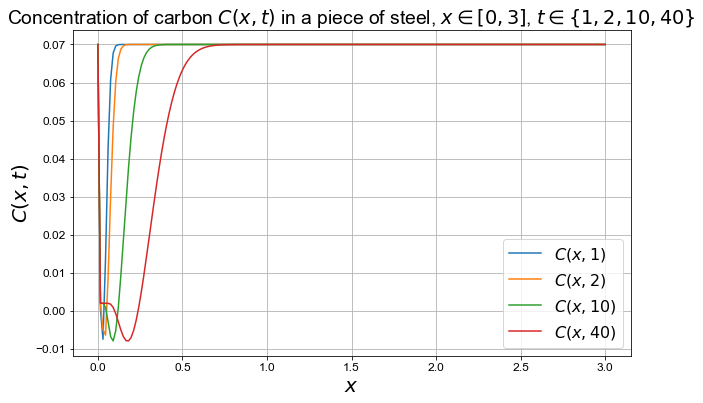

In [12]:
# plot C(x, t) versus x for each specified value of t
# and overlay the four curves (corresponding to four
# values of t) in one figure

pylab.plot(data['x'], data['carbon_1'])
pylab.plot(data['x'], data['carbon_2'])
pylab.plot(data['x'], data['carbon_10'])
pylab.plot(data['x'], data['carbon_40'])

pylab.title('Concentration of carbon $C(x,t)$ in a piece of steel, $x \in [0, 3]$, $t \in \{1, 2, 10, 40\}$')
pylab.xlabel('$x$')
pylab.ylabel('$C(x,t)$')
pylab.grid()

pylab.legend(('$C(x,1)$',
              '$C(x,2)$',
              '$C(x,10)$',
              '$C(x,40)$'))